# Example `gmx dssp` dat file analysis

In this notebook I'll explore some simple analysis and visualisations of an example `gmx dssp` dat file.

In [1]:
# Standard libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read in the data

Each line of the dat file is supposed to be a DSSP sequence for a single frame of a trajectory.

I'll parse this into a Pandas DataFrame, with each row representing a single frame, and each column representing a single residue.

In [2]:
# Read the data
with open('data/ss.dat', 'r') as file:
    lines = file.readlines()

data = [[char for char in line.strip()] for line in lines]
df = pd.DataFrame.from_records(data)
df

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,~,H,H,H,H,H,H,H,H,H,...,H,T,T,S,S,S,~,S,~,~
1,~,H,H,H,H,H,H,H,H,H,...,G,G,G,S,S,S,~,~,~,~
2,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
3,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
4,~,H,H,H,H,H,H,H,H,H,...,T,T,T,S,S,S,~,~,~,~
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,~,~,H,H,H,H,H,H,H,H,...,H,H,S,~,S,S,~,~,~,~
9997,~,~,H,H,H,H,H,H,H,H,...,S,S,S,~,S,S,~,~,~,~
9998,~,~,H,H,H,H,H,H,H,H,...,T,S,S,~,S,S,~,~,~,~
9999,~,~,H,H,H,H,H,H,H,H,...,T,T,S,~,S,S,~,~,~,~


## Basic statistics

How long is the sequence?
How many frames are there?

In [3]:
# How long are the sequences and how many frames?
print(f"Length of sequences: {len(df.columns)}")
print(f"Number of frames: {len(df)}")

Length of sequences: 932
Number of frames: 10001


## Secondary structure composition

Now let's look at the secondary structure composition.

In [4]:
# Unique elements in the dataset
unique_elements = sorted(set(df.values.flatten()))
unique_elements

['B', 'E', 'G', 'H', 'I', 'P', 'S', 'T', '~']

To simplify the analysis, I'll collapse the 7-state DSSP sequence into a 3-state sequence, where the states are:

- H: Helix
- E: Sheet
- C: Coil


In [5]:
# Reduce SS from 7-state* to 3-state
# 7-state: H, G, I, B, E, T, S
# 3-state: H, E, C
# * plus ~ and P as coil and turn respectively, from Gromacs gmx dssp output
ss_dict = {'H': 'H', 'G': 'H', 'I': 'H', 'B': 'E', 'E': 'E', 'T': 'C', 'S': 'C', '~': 'C', 'P': 'C'}
df_reduced = df.replace(ss_dict)
df_reduced

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,C,H,H,H,H,H,H,H,H,H,...,H,C,C,C,C,C,C,C,C,C
1,C,H,H,H,H,H,H,H,H,H,...,H,H,H,C,C,C,C,C,C,C
2,C,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C
3,C,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C
4,C,H,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,C,C,H,H,H,H,H,H,H,H,...,H,H,C,C,C,C,C,C,C,C
9997,C,C,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C
9998,C,C,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C
9999,C,C,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C


In [6]:
# Sequence composition
df_reduced.iloc[0, :].value_counts()

H    390
C    374
E    168
Name: 0, dtype: int64

The protein is mostly helical, with a small amount of sheet and coil.

I'm not sure what the "~" and "P" characters are, but we'll put that to onse side for now.

## Secondary structure transitions

Now let's look at the transitions between secondary structure states.

In [7]:
# Position variation
position_variation = df_reduced.apply(lambda x: x.value_counts()).fillna(0)
position_variation

,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
C,10001.0,5801.0,1865.0,1011.0,591.0,524.0,537.0,14.0,109.0,164.0,...,7475.0,7800.0,9850.0,10001.0,10001.0,10001.0,10001.0,10001.0,10001.0,10001.0
E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,4200.0,8136.0,8990.0,9410.0,9477.0,9464.0,9987.0,9892.0,9837.0,...,2526.0,2201.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


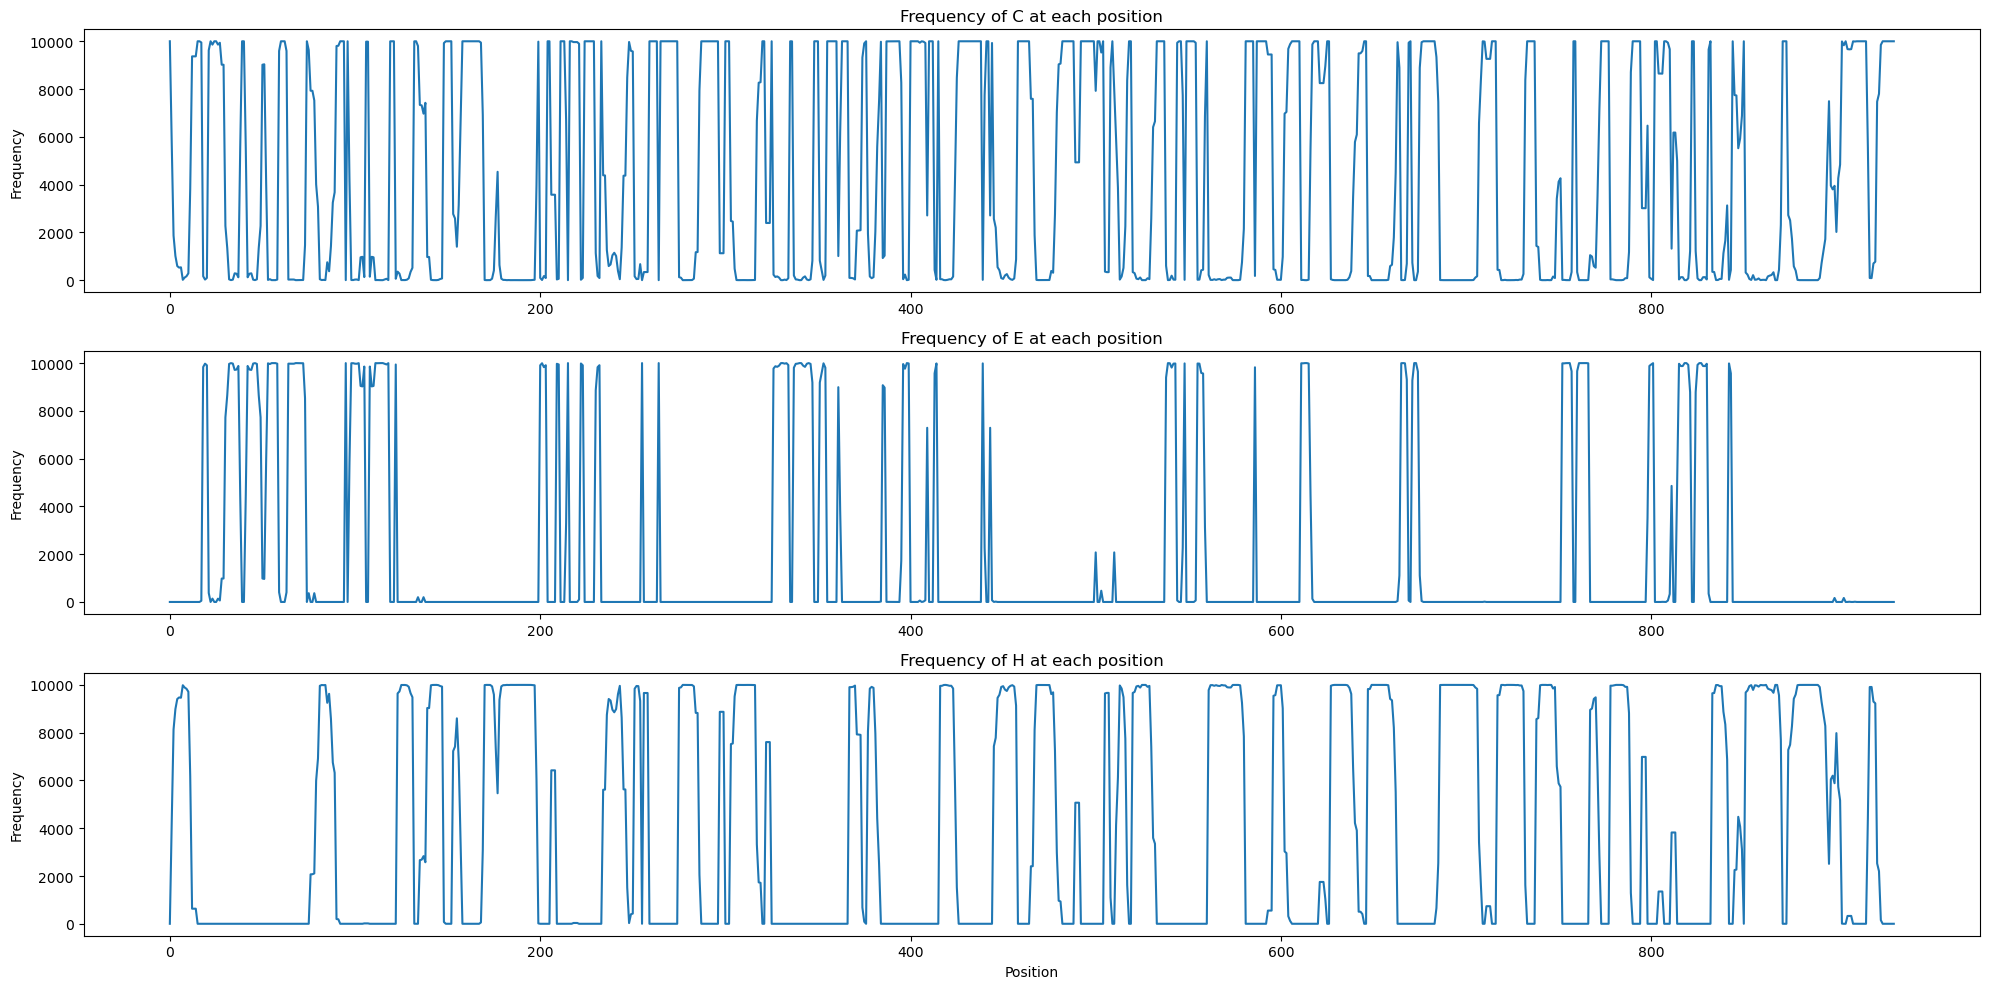

In [8]:
# Plot the frequency of each DSSP label at each position, one plot per label
fig, axs = plt.subplots(nrows=3, figsize=(20, 10))
for ax, label in zip(axs, position_variation.index):
    ax.plot(position_variation.loc[label, :], label=label)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {label} at each position')

ax.set_xlabel('Position')
plt.tight_layout()



## Consensus secondary structure

Now for the consensus secondary structure.

In [9]:
# Evaluate secondary structure at each position
consensus = df_reduced.mode(axis=0)
consensus


,0,1,2,3,4,5,6,7,8,9,...,922,923,924,925,926,927,928,929,930,931
0,C,C,H,H,H,H,H,H,H,H,...,C,C,C,C,C,C,C,C,C,C


## Summarise the secondary structure variations

To summarise the seecoondary structure variations, I'll try a couple of different approaches.

1. Classify positions as variable of constant based on a threshold.
2. Plot the (1 - the frequency of the most common secondary structure state).

In [10]:
# Threshold for a position to be considered consistent
threshold = 0.9
consistent_positions = []
variable_positions = []
for position in df_reduced:
    if df_reduced[position].value_counts().max() > threshold * len(df_reduced[position]):
        consistent_positions.append(position)
    else:
        variable_positions.append(position)

print('N consistent positions: ', len(consistent_positions))
print('N variable positions: ', len(variable_positions))

N consistent positions:  764
N variable positions:  168


In [11]:
df_reduced.apply(lambda x: x.value_counts().max() > threshold * len(x), axis=0)

0       True
1      False
2      False
3      False
4       True
       ...  
927     True
928     True
929     True
930     True
931     True
Length: 932, dtype: bool

## Visualise secondary structure variable regions

In [12]:
# Varibility of each position
variability = 1 - df_reduced.apply(lambda x: x.value_counts().max() / len(x), axis=0)
variability

0      0.000000
1      0.419958
2      0.186481
3      0.101090
4      0.059094
         ...   
927    0.000000
928    0.000000
929    0.000000
930    0.000000
931    0.000000
Length: 932, dtype: float64

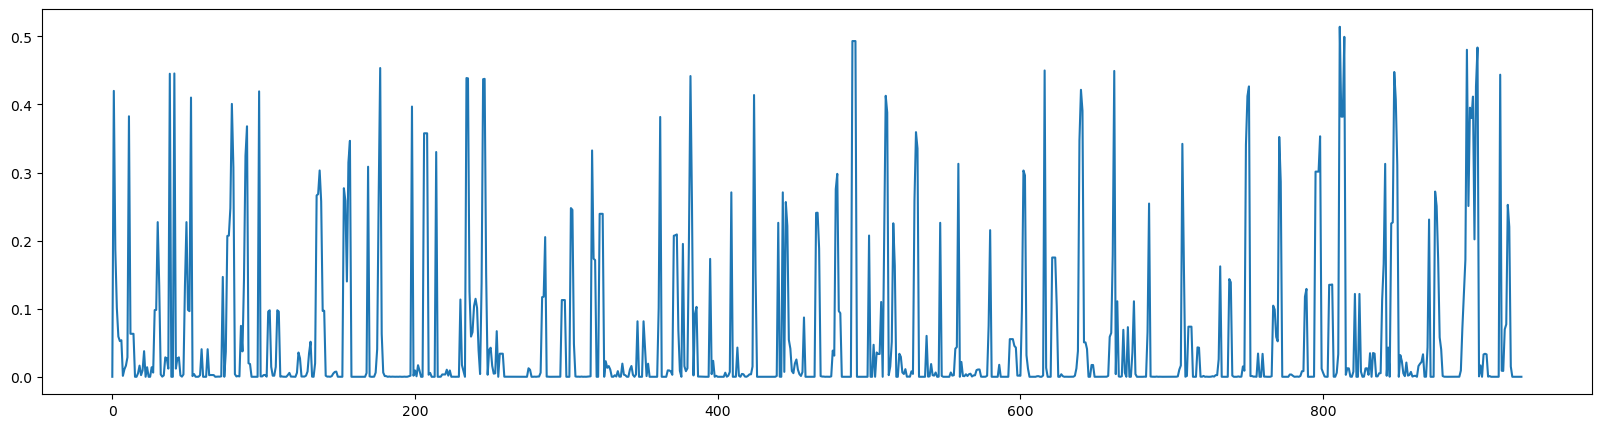

In [13]:
# Plot variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability)

Since that's a bit messy, let's try a windowed approach.

In [14]:
# window the variability
window_size = 7
variability_windowed = variability.rolling(window_size).mean()
variability_windowed


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
927    0.080692
928    0.069679
929    0.033597
930    0.002157
931    0.000000
Length: 932, dtype: float64

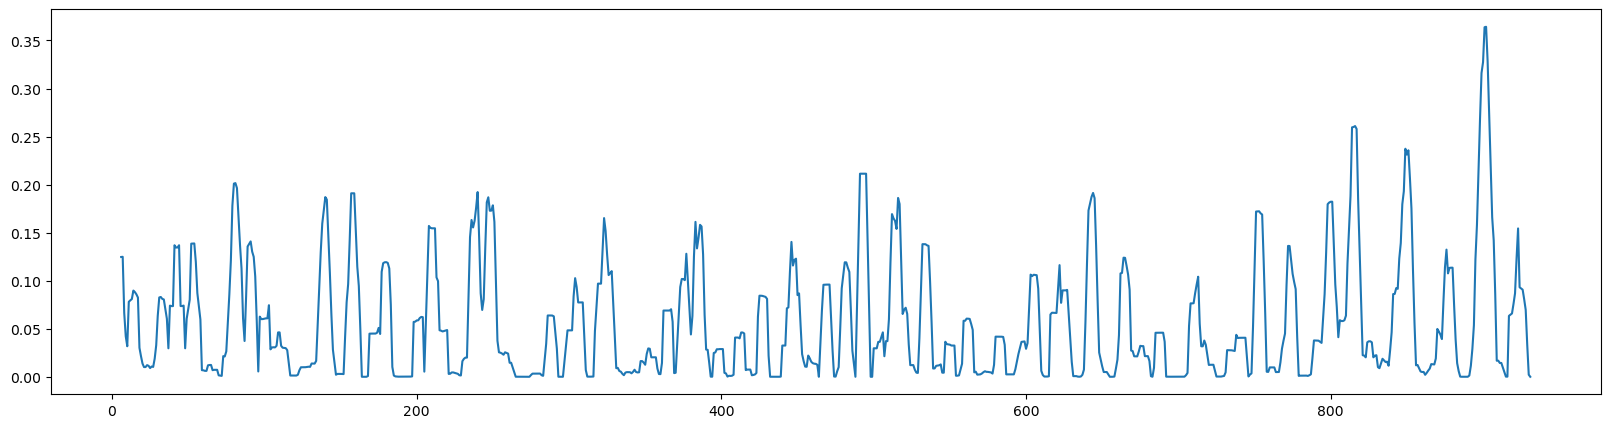

In [15]:
# plot windowed variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability_windowed)

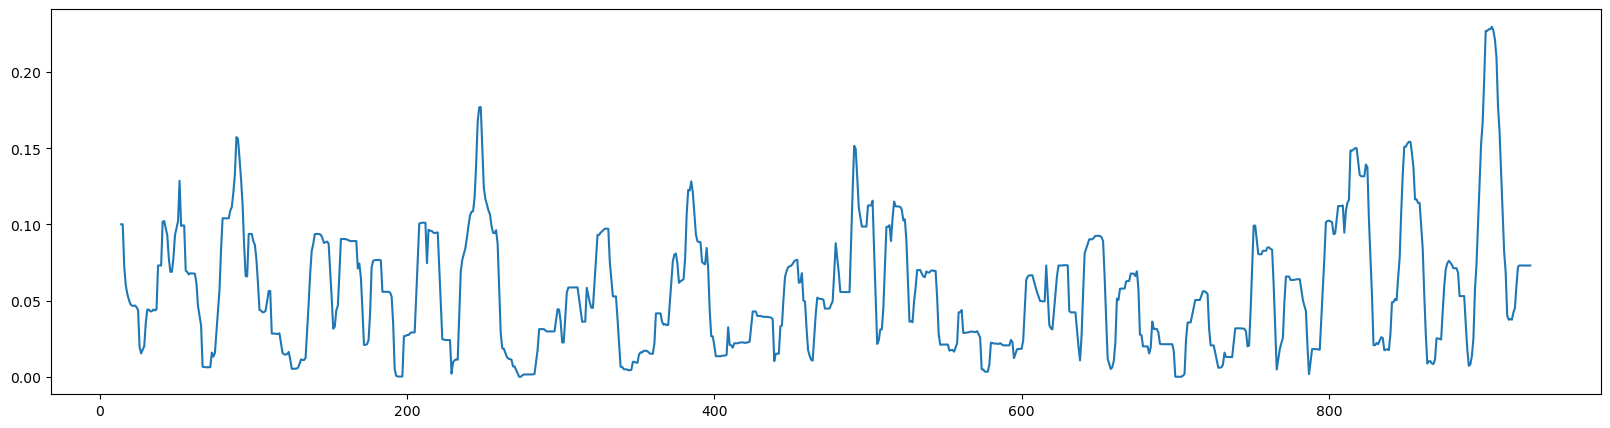

In [16]:
# Try larger window
window_size = 15
variability_windowed = variability.rolling(window_size).mean()

# plot windowed variability
fig, ax = plt.subplots(figsize=(20, 5))
_ = ax.plot(variability_windowed)


Altogether it looks like there are two highly variable regions. One a bit beyond residue 400 and one at the C-terminus.

In [17]:
# Close look at a variable region
df_reduced.iloc[:, 400:420].apply(lambda x: x.value_counts()).fillna(0)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
C,10001.0,10001.0,10001.0,10001.0,10001.0,9941.0,10000.0,9985.0,9929.0,2709.0,10001.0,10001.0,10000.0,429.0,15.0,10001.0,42.0,37.0,3.0,0.0
E,0.0,0.0,0.0,0.0,0.0,60.0,1.0,16.0,72.0,7292.0,0.0,0.0,1.0,9572.0,9986.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9959.0,9964.0,9998.0,10001.0


## Detailed secondary structure transitions

In [18]:
# Enumerate the transitions between two frames
pd.crosstab(df_reduced.iloc[0], df_reduced.iloc[1])

1,C,E,H
0,,,
C,346,6,22
E,12,156,0
H,24,0,366
